In [1]:
import sympy as sp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sympy.physics.units.quantities as sq

In [5]:
import unicodedata as ud

In [6]:
well_length = sq.Symbol( 'L', nonzero=True, positive=True )
highest_potential = sq.Symbol( "V_max", nonzero=True, positive=True )
x = sp.Symbol( 'x', positive=True )
m = sq.Quantity( 'm', positive=True, nonzero=True )
hbar = sq.Quantity( "hbar" )
total_energy = sq.Symbol( 'E', nonzero=True, positive=True )
inverse_total_energy = 1.0 / total_energy
psi_symbol = ud.lookup( "GREEK SMALL LETTER PSI" )
psi = sp.Function( "psi" )
normalization_constant = sq.Symbol( 'A', nonzero=True )
C1 = sp.Symbol( "C1" )#, nonzero=True )
C2 = sp.Symbol( "C2" )#, nonzero=True )
k = sp.Symbol("k", nonzero=True)

In [7]:
plancks_constant_value = 6.62606957 * ( 10 ** ( -34.0 ) )

In [8]:
potential_energy = sp.Piecewise( ( highest_potential, x <= 0 ), ( 0, x < well_length ), ( highest_potential, x >= well_length ) )

In [9]:
second_derivative = sp.Derivative( psi( x ), x, 2 )
make_shrodinger_left = lambda potential, psi_parameter : ( ( -( hbar ** 2 ) / ( 2 * m ) ) * second_derivative + ( psi( psi_parameter ) * potential ) )
make_shrodinger_right = lambda psi_parameter : total_energy * psi( psi_parameter )
make_psi_equal = lambda input_value, value : sp.Eq( psi( sp.Eq( x, input_value ) ), value )
set_equal = lambda to_set, value : sp.Eq( to_set, value )
both_sides = lambda equation, opreation : sp.Eq( opreation( equation.lhs ), opreation( equation.rhs ) )
equation_to_dict = lambda equation : { equation.lhs : equation.rhs }

In [10]:
hbar_eq = sp.Eq( hbar, sp.physics.units.planck / ( 2 * sp.pi ) )

In [11]:
hbar_eq

Eq(hbar, planck/(2*pi))

In [12]:
shrodinger_left_high = sp.simplify( make_shrodinger_left( highest_potential, x ) )
shrodinger_left_low = sp.simplify( make_shrodinger_left( 0, x ) )
shrodinger_left = sp.simplify( make_shrodinger_left( potential_energy, x ) )
shrodinger_right = make_shrodinger_right( x )
shrodinger = sp.simplify( sp.Eq( shrodinger_left, shrodinger_right ) )
shrodinger_zero = sp.simplify( sp.Eq( shrodinger_left - shrodinger_right, 0 ) )
shrodinger_low_zero = sp.Eq( shrodinger_left_low - shrodinger_right, 0 )
shrodinger_low_zero_hand = sp.Eq( second_derivative + ( ( 2 * total_energy * m ) / ( hbar ** 2 ) ) * psi( x ), 0 )
shrodinger_low_zero_ksq = sp.Eq( second_derivative + ( ( k ** 2 ) * psi( x ) ), 0 )

k_sq = sp.Eq( k ** 2, ( ( 2 * total_energy * m ) / ( hbar ** 2 ) ) )

In [13]:
make_normalization_left = lambda psi_function : sp.integrate( psi_function * sp.conjugate( psi_function ), ( x, 0, well_length ) )
make_normalization = lambda psi_function : sp.Eq( normalization_left( psi_function ), 1 )
normalization_left = make_normalization_left( psi( x ) )
normalization = sp.Eq( normalization_left, 1 )

In [14]:
shrodinger_low_zero = sp.Eq( -( ( shrodinger_low_zero.lhs * 2*m ).simplify() / ( hbar ** 2 ) ).simplify(), 0 )

In [15]:
normalization

Eq(Integral(psi(x)*conjugate(psi(x)), (x, 0, L)), 1)

In [16]:
shrodinger_low_zero_ksq

Eq(k**2*psi(x) + Derivative(psi(x), (x, 2)), 0)

In [17]:
diff_sol = sp.solvers.ode.dsolve( shrodinger_low_zero_ksq, psi( x ), ivar = x )
#ics = { psi( 0 ): 0, psi( well_length ): 0 }

In [18]:
diff_sol

Eq(psi(x), C1*sin(x*Abs(k)) + C2*cos(k*x))

In [19]:
boundries = [
        sp.Eq( diff_sol.rhs.subs( x, 0 ), 0 ), 
        sp.Eq( diff_sol.rhs.subs( x, well_length ), 0 )
    ]

In [20]:
boundries[ 0 ]

Eq(C2, 0)

In [21]:
boundries[ 1 ]

Eq(C1*sin(L*Abs(k)) + C2*cos(L*k), 0)

In [22]:
boundry_applied = diff_sol.subs( C2, 0 )

In [23]:
boundry_applied

Eq(psi(x), C1*sin(x*Abs(k)))

In [24]:
particular_appled = boundries[ 1 ].subs( boundries[ 0 ].lhs, boundries[ 0 ].rhs )

In [25]:
particular_appled

Eq(C1*sin(L*Abs(k)), 0)

In [26]:
assume_c1_not_zero = sp.Eq( particular_appled.lhs.as_two_terms()[ 1 ], particular_appled.rhs )

In [27]:
assume_c1_not_zero

Eq(sin(L*Abs(k)), 0)

In [28]:
assume_c1_not_zero_2k = sp.Eq( sp.sin( 2 * well_length * sp.Abs( k ) ), 0 )

In [29]:
assume_c1_not_zero_2k

Eq(sin(2*L*Abs(k)), 0)

In [30]:
n = sp.Symbol( 'n', integer=True )

In [31]:
assume_c1_not_zero_nk = sp.Eq( sp.sin( n * well_length * sp.Abs( k ) ), 0 )

In [32]:
assume_c1_not_zero_nk

Eq(sin(L*n*Abs(k)), 0)

In [33]:
assume_c1_not_zero_nk.lhs

sin(L*n*Abs(k))

In [34]:
k_n_positive = sp.Eq( assume_c1_not_zero_nk.lhs, assume_c1_not_zero.lhs )

In [35]:
k_n_positive

Eq(sin(L*n*Abs(k)), sin(L*Abs(k)))

In [36]:
assume_c1_not_zero

Eq(sin(L*Abs(k)), 0)

In [37]:
assume_k_positive = assume_c1_not_zero.refine( sp.Q.positive( k ) )

In [38]:
assume_k_positive

Eq(sin(L*k), 0)

In [39]:
assum_k_positive_and_harmonic = k_n_positive.refine( sp.Q.positive( k ) )

In [40]:
assum_k_positive_and_harmonic = assum_k_positive_and_harmonic.refine( sp.Q.integer( n ) )

In [41]:
steps = {}
steps[ 0 ] = sp.Eq( make_normalization_left( boundry_applied.rhs ), 1 )

In [42]:
steps[ 0 ]

Eq(C1*(L*k/2 - sin(L*k)*cos(L*k)/2)*conjugate(C1)/k, 1)

In [43]:
steps[ 1 ] = steps[ 0 ].simplify()

In [44]:
steps[ 1 ]

Eq(C1*(L*k - sin(2*L*k)/2)*conjugate(C1)/(2*k), 1)

In [45]:
steps[ 2 ] = steps[ 1 ].refine( sp.Q.positive( k ) ).refine( sp.Q.nonzero( k ) )

In [46]:
steps[ 2 ]

Eq(C1*(L*k - sin(2*L*k)/2)*conjugate(C1)/(2*k), 1)

In [55]:
assume_c1_not_zero_nk

Eq(sin(L*n*Abs(k)), 0)

In [80]:
lnk_zero = sp.Eq( assume_c1_not_zero_nk.lhs.refine( sp.Q.positive( k ) ).refine( sp.Q.integer( n ) ).refine( sp.Q.positive( n ) ), 0 )

In [81]:
lnk_zero

Eq(sin(L*k*n), 0)

In [85]:
lnk_lk_zero = sp.Eq( lnk_zero.lhs, assume_k_positive, evaluate = False )

In [88]:
lnk_lk_zero

Eq(sin(L*k*n), Eq(sin(L*k), 0))

In [92]:
l2k_zero = sp.Eq( lnk_lk_zero.lhs.subs( n, 2 ), 0 )

In [93]:
l2k_zero

Eq(sin(2*L*k), 0)

In [191]:
#help( steps[ 2 ] )

steps[ 2 ].refine( l2k_zero.refine( sp.Q.positive( k ) ) )#sp.Q.is_true( assume_c1_not_zero_nk.rerfine( sp.Q.positive( n ) )

Eq(C1*(L*k - sin(2*L*k)/2)*conjugate(C1)/(2*k), 1)

In [192]:
test = steps[ 2 ].subs( equation_to_dict( l2k_zero ) )

In [193]:
test

Eq(C1*L*conjugate(C1)/2, 1)

In [194]:
test = test.refine( sp.Q.real( C1 ) )

In [195]:
test = test.refine( sp.Q.positive( C1 ) )

In [196]:
sp.solve( test, C1 )

[-sqrt(2)/sqrt(L), sqrt(2)/sqrt(L)]

In [197]:
test.refine( sp.Q.positive( C1 ) )

Eq(C1*L*conjugate(C1)/2, 1)

In [198]:
#test = test.lhs.refine( sp.Q.rational( C1 ) )

In [204]:
r_img = test.lhs.as_real_imag() #.separate()

In [121]:
#test.lhs.refine( sp.Q.rational( C1 ) )

C1*L*conjugate(C1)/2

In [207]:
r_img[ 0 ].refine( sp.Q.real( C1 ) )

C1**2*L/2

In [208]:
help( test.lhs.as_real_imag )

Help on method as_real_imag in module sympy.core.mul:

as_real_imag(deep=True, **hints) method of sympy.core.mul.Mul instance
    Performs complex expansion on 'self' and returns a tuple
    containing collected both real and imaginary parts. This
    method can't be confused with re() and im() functions,
    which does not perform complex expansion at evaluation.
    
    However it is possible to expand both re() and im()
    functions and get exactly the same results as with
    a single call to this function.
    
    >>> from sympy import symbols, I
    
    >>> x, y = symbols('x,y', real=True)
    
    >>> (x + y*I).as_real_imag()
    (x, y)
    
    >>> from sympy.abc import z, w
    
    >>> (z + w*I).as_real_imag()
    (re(z) - im(w), re(w) + im(z))



In [48]:
test = steps[ 2 ]

In [49]:
double_angle_k_length = sp.sin( 2 * well_length * k )

In [50]:
double_angle_k_length

sin(2*L*k)

In [51]:
double_angle_equivelence = sp.Eq( double_angle_k_length, assum_k_positive_and_harmonic.rhs )

In [52]:
double_angle_equivelence

Eq(sin(2*L*k), sin(L*k))

In [53]:
system = [
        assum_k_positive_and_harmonic, 
        assume_k_positive.refine( sp.Q.nonzero( k ) ), 
        double_angle_equivelence 
    ]

In [54]:
sin2lk = sp.solve( system, double_angle_k_length )

In [55]:
sin2lk

{sin(2*L*k): sin(L*k)}

In [56]:
steps[ 3 ] = steps[ 2 ].subs( sin2lk )

In [57]:
steps[ 3 ]

Eq(C1*(L*k - sin(L*k)/2)*conjugate(C1)/(2*k), 1)

In [58]:
steps[ 4 ] = steps[ 3 ].refine( assume_k_positive )

In [59]:
steps[ 4 ]

Eq(C1*(L*k - sin(L*k)/2)*conjugate(C1)/(2*k), 1)

In [60]:
#^^ You have to be kidding

In [61]:
steps[ 4 ] = steps[ 3 ].subs( { assume_k_positive.lhs: assume_k_positive.rhs } )

In [62]:
steps[ 4 ]

Eq(C1*L*conjugate(C1)/2, 1)

In [63]:
conjugate_multiply = C1 * sp.conjugate( C1 )

In [64]:
conjugate_multiply

C1*conjugate(C1)

In [65]:
conjugate_real = sp.Eq( conjugate_multiply, sp.Abs( C1 ) ** 2 )

In [66]:
conjugate_real

Eq(C1*conjugate(C1), Abs(C1)**2)

In [67]:
(( C1 + sp.I ) * ( C1 - sp.I ) ).expand()

C1**2 + 1

In [68]:
conjugate_real.refine( sp.Q.real( C1 ) )

Eq(C1*conjugate(C1), C1**2)

In [69]:
conjugate_multiply.refine( sp.Q.real( C1 ) ).simplify().expand()

C1*conjugate(C1)

In [70]:
reeq = sp.Eq( C1 - sp.I, sp.re( C1 ) - sp.I )

In [71]:
reeq

Eq(C1 - I, re(C1) - I)

In [72]:
c1_real = sp.solve( reeq, C1 )

In [73]:
c1_real

[{C1: re(C1), im(C1): 0}]

In [74]:
steps[ 5 ] = steps[ 4 ].subs( c1_real[ 0 ] )#[ sp.conjugate( C1 ) ] )

In [75]:
steps[ 5 ]

Eq(L*re(C1)**2/2, 1)

In [76]:
steps[ 6 ] = steps[ 5 ].subs( { sp.re( C1 ): C1 } )

In [77]:
steps[ 6 ]

Eq(C1**2*L/2, 1)

In [78]:
steps[ 7 ] = both_sides( steps[ 6 ], lambda side : 2 * side / well_length )

In [79]:
steps[ 7 ] 

Eq(C1**2, 2/L)

In [80]:
steps[ 8 ] = both_sides( steps[ 7 ], lambda side : sp.sqrt( side ) )

In [81]:
steps[ 8 ]

Eq(sqrt(C1**2), sqrt(2)/sqrt(L))

In [82]:
steps[ 9 ] = steps[ 8 ]

In [83]:
steps[ 9 ] 

Eq(sqrt(C1**2), sqrt(2)/sqrt(L))

In [84]:
steps[ 10 ] = steps[ 9 ].refine( sp.Q.positive( C1 ) )

In [85]:
steps[ 10 ]

Eq(C1, sqrt(2)/sqrt(L))

In [86]:
# FINALLLLLY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! :'D

In [87]:
final_normalization_constant = steps[ 10 ]

In [147]:
psi_no_k = boundry_applied.subs( { 
        final_normalization_constant.lhs : final_normalization_constant.rhs 
    } )

In [88]:

psi_middle = boundry_applied.subs( { 
        final_normalization_constant.lhs : final_normalization_constant.rhs 
    } )

In [89]:
psi_middle

Eq(psi(x), sqrt(2)*sin(x*Abs(k))/sqrt(L))

In [90]:
#YESSSSSSSSSSS!!!!!!!!!!!!! :'D

In [91]:
k_value = both_sides( k_sq, lambda side : sp.sqrt( side ).simplify() )

In [92]:
k_value

Eq(Abs(k), sqrt(2)*sqrt(m)*sqrt(E)/hbar)

In [93]:
k_value_substitutable = equation_to_dict( k_value )

In [143]:
k_sq

Eq(k**2, 2*m*E/hbar**2)

In [94]:
psi_middle = psi_middle.subs( k_value_substitutable )

In [95]:
psi_middle

Eq(psi(x), sqrt(2)*sin(sqrt(2)*sqrt(m)*sqrt(E)*x/hbar)/sqrt(L))

In [96]:
# OH MY GOODNESS THE DERIVATION IS FINISHED!!!!! :D LETS PLOT IT

In [97]:
constant_solve_steps = {}
constant_solve_steps[ 0 ] = assume_c1_not_zero.subs( k_value_substitutable )

In [98]:
constant_solve_steps[ 0 ]

Eq(sin(sqrt(2)*sqrt(m)*sqrt(E)*L/hbar), 0)

In [99]:
# Lets find some values that statisfy this relation so we can plot psi!

In [100]:
energy_length_mass = sp.Symbol( "ELM" )

In [101]:
constant_solve_steps[ 1 ] = constant_solve_steps[ 0 ] \
        .subs( total_energy, energy_length_mass ) \
        .subs( well_length, energy_length_mass ) \
        .subs( m, energy_length_mass )


In [102]:
constant_solve_steps[ 1 ]#.atoms()

Eq(sin(sqrt(2)*ELM**2/hbar), 0)

In [103]:
constant_solve_substep = {}
constant_solve_substep[ 0 ] = sp.Eq( constant_solve_steps[ 1 ].lhs.args[ 0 ], sp.pi * 2 )

In [104]:
constant_solve_substep[ 0 ]

Eq(sqrt(2)*ELM**2/hbar, 2*pi)

In [105]:
constant_solve_substep[ 1 ] = both_sides( constant_solve_substep[ 0 ], lambda side : side / ( 2 * sp.pi ) )

In [106]:
constant_solve_substep[ 1 ]

Eq(sqrt(2)*ELM**2/(2*pi*hbar), 1)

In [107]:
constant_solve_substep[ 2 ] = both_sides( constant_solve_substep[ 1 ], lambda side : side / ( energy_length_mass ** 2 ) )

In [108]:
constant_solve_substep[ 2 ]

Eq(sqrt(2)/(2*pi*hbar), ELM**(-2))

In [109]:
constant_solve_substep[ 3 ] = sp.solve( constant_solve_substep[ 2 ], energy_length_mass ** 2 )

In [110]:
constant_solve_substep[ 3 ][ 0 ]

sqrt(2)*pi*hbar

In [111]:
constant_solve_substep[ 4 ] = sp.sqrt( constant_solve_substep[ 3 ][ 0 ] )

In [112]:
constant_solve_substep[ 4 ]

2**(1/4)*sqrt(pi)*sqrt(hbar)

In [113]:
energy_length_mass_product = constant_solve_substep[ 4 ]

In [114]:
energy_length_mass_product

2**(1/4)*sqrt(pi)*sqrt(hbar)

In [115]:
# Energy Length and Mass multiplied together must be the above value

In [116]:
hbar_eq

Eq(hbar, planck/(2*pi))

In [117]:
energy_length_mass_product_planck = energy_length_mass_product.subs( equation_to_dict( hbar_eq ) )

In [118]:
energy_length_mass_product_planck

2**(3/4)*sqrt(planck)/2

In [119]:
energy_length_mass_relation = sp.Eq( total_energy * m * well_length, energy_length_mass_product_planck )

In [120]:
energy_length_mass_relation

Eq(m*E*L, 2**(3/4)*sqrt(planck)/2)

In [216]:
float( energy_length_mass_relation.rhs.subs( sp.physics.units.planck, plancks_constant_value ) )

2.1645643269630106e-17

In [121]:
length_product = sp.Eq( sp.Function( well_length )( total_energy, m ), sp.solve( energy_length_mass_relation, well_length )[ 0 ] )

In [122]:
length_product

Eq(L(E, m), 2**(3/4)*sqrt(planck)/(2*m*E))

In [123]:
psi_middle

Eq(psi(x), sqrt(2)*sin(sqrt(2)*sqrt(m)*sqrt(E)*x/hbar)/sqrt(L))

In [124]:
constant_solve_steps[ 1 ].subs( energy_length_mass, energy_length_mass_relation.rhs )

Eq(sin(planck/hbar), 0)

In [125]:
change_right = lambda equation, operation : sp.Eq( equation.lhs, operation( equation.rhs ) )

set_length = lambda length : change_right( energy_length_mass_relation \
        .subs( sp.physics.units.planck, plancks_constant_value ) \
        .subs( well_length, length ), lambda right : right.evalf() )

In [126]:
length_eq_1 = set_length( 1 )

In [127]:
length_eq_1

Eq(m*E, 2.16456432696301e-17)

In [128]:
mass_coefficent = .1
mass_value = sp.Eq( m, length_eq_1.rhs * mass_coefficent )

In [129]:
mass_value

Eq(m, 2.16456432696301e-18)

In [130]:
energy_value = sp.Eq( total_energy, length_eq_1.rhs * ( 1.0 - mass_coefficent ) )

In [131]:
energy_value

Eq(E, 1.94810789426671e-17)

In [132]:
psi_middle

Eq(psi(x), sqrt(2)*sin(sqrt(2)*sqrt(m)*sqrt(E)*x/hbar)/sqrt(L))

In [245]:
def make_psi_middle( mass_coefficent = .1, well_length_value = 1, psi_middle = psi_middle, n = 1 ): 
    mass_energy_length_relation = set_length( well_length_value )
    #hva= 1e-17
    print( mass_energy_length_relation )
    mass_value = sp.Eq( m, mass_energy_length_relation.rhs * mass_coefficent )
    print( mass_value, mass_value.rhs )
    energy_value = sp.Eq( total_energy, mass_energy_length_relation.rhs * ( 1.0 - mass_coefficent ) )
    print( energy_value, energy_value.rhs )
    sp.pprint( psi_middle )
    print( "AAA" )
    #print( float( energy_value.rhs ) )
    print( float( equation_to_dict( hbar_eq )[ hbar ].subs( sp.physics.units.planck, plancks_constant_value ) ) )
    plank = equation_to_dict( hbar_eq )[ hbar ].subs( sp.physics.units.planck, plancks_constant_value )
    print( "plank: ", plank, "float: ", float( plank ) )
    eng = np.sqrt( float( energy_value.rhs ) )
    print( "energy: ", eng )
    ma = np.sqrt( float( mass_value.rhs ) )
    print( "mass: ", ma )
    print( eng * ma * np.sqrt( 2.0 ) / float( plank ) )
    return change_right( psi_middle, lambda right : right \
            .subs( equation_to_dict( hbar_eq ) ) \
            .subs( sp.physics.units.planck, plancks_constant_value ) \
            .subs( m, mass_value.rhs ) \
            .subs( total_energy, energy_value.rhs ) \
            .subs( well_length, well_length_value )
        )


In [246]:
psi_filled_middle = make_psi_middle()# well_length_value =1e4 )

Eq(m*E, 2.16456432696301e-17)
Eq(m, 2.16456432696301e-18) 2.16456432696301e-18
Eq(E, 1.94810789426671e-17) 1.94810789426671e-17
             ⎛√2⋅√E⋅x⋅√m⎞
       √2⋅sin⎜──────────⎟
             ⎝   hbar   ⎠
ψ(x) = ──────────────────
               √L        
AAA
1.0545717253362894e-34
plank:  3.313034785e-34/pi float:  1.0545717253362894e-34
energy:  4.4137375253482275e-09
mass:  1.4712458417827425e-09
8.708244743174534e+16


In [247]:
psi_filled_middle

Eq(psi(x), sqrt(2)*sin(19600437068423452*sqrt(2)*pi*x))

In [248]:
psi_middle_executable = sp.lambdify( x, psi_filled_middle.rhs )

In [258]:
psi_middle_executable( plancks_constant_value / ( 2 * np.pi ) )

1.2987385961778065e-17

In [249]:
#sp.plot( psi_filled_middle.rhs, ( x, 0, 1 ) )

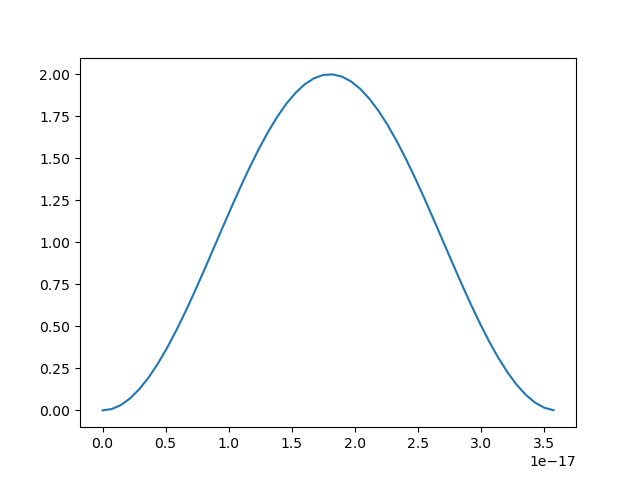

In [276]:
%matplotlib widget

well_range = np.linspace( 0.0, 5.4e16 * plancks_constant_value )#, num=int( 1e4 ) )

psi_middle_data = psi_middle_executable( well_range ) ** 2.0

plt.plot( well_range, psi_middle_data )

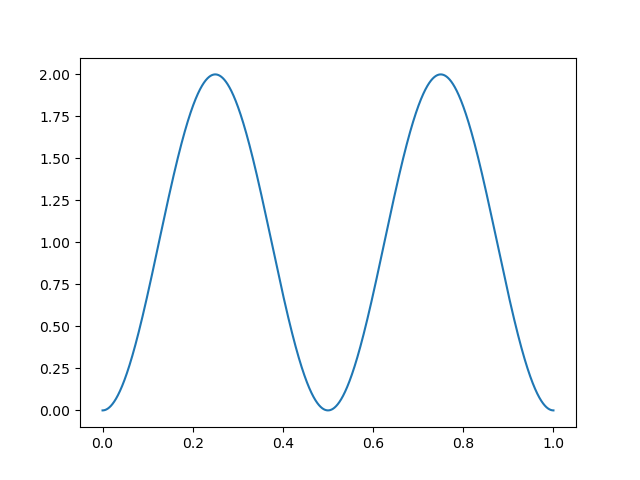

In [277]:
%matplotlib widget

well_range = np.linspace( 0.0, 1.0, num=int( 1e4 ) )

test = psi_no_k

test = test.subs( { sp.Abs( k ): ( 2 * sp.pi / well_length ) } )
test = test.subs( { well_length: 1 } )

psi_middle_data = sp.lambdify( x, test.rhs )( well_range ) ** 2

plt.plot( well_range, psi_middle_data )

In [274]:
test

Eq(psi(x), sqrt(2)*sin(2*pi*x))